# Introduction
The main objective of this project is to find the highest correlations of the gross earnings in movie industry. 

The data is from 1986 to 2016, and it can be found in Kaggle: https://www.kaggle.com/datasets/danielgrijalvas/movies

The project includes some of the basic Python functions to process, clean, analyze and visualize data.

The Python libraries used are: pandas, seaborn, numpy and matplotlib.

In [143]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import copy

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read the data
df = pd.read_csv(r'C:\Users\Sandra Lucía\Documents\CARLOS\Datasets\Movie Industry\movies.csv')

In [145]:
# Data view

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning
## Looking for missing data

In [146]:
# Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [147]:
df.dropna(subset=['budget', 'gross'], inplace=True)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.002207505518763797%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0001839587932303164%
budget - 0.0%
gross - 0.0%
company - 0.0003679175864606328%
runtime - 0.0001839587932303164%


In [148]:
# Data cleaning
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Formatting data type in some columns

'pd.to_numeric(df['budget'], errors='coerce')' attempts to convert the 'budget' column to numeric values while setting 
'errors='coerce'', which replaces non-numeric values (including empty cells) with NaN.
'.astype('Int64')' then converts the resulting numeric values to the 'Float64' data type, which is a nullable integer type 
in Pandas and allows for NaN values.

In [191]:
# formatting data type in some columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').astype('float64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').astype('float64')
df.dtypes

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget           float64
gross            float64
company           object
runtime          float64
yearcorrected     object
dtype: object

## Year column
The year and the released year doesn't always match, so the released date has to be in a new column. 

To achieve that, released column is transformed to a string, then a regular expression (r'(\d{4})') is used to get the year.

-- 'r' before the string indicates that it's a raw string literal in Python, which is often used with regular expressions 
to avoid unintended escape sequences.
-- '(' and ')' are used to create a capturing group. In this case, it captures the four digits that represent the year.
-- '\d' is a shorthand character class in regular expressions, which matches any digit (0-9).
-- '{4}' specifies that the previous \d should be repeated exactly four times. In other words, it matches exactly 
four consecutive digits.

In [175]:
# Create Year column

df['yearcorrected'] = df['released'].astype(str).str.extract(r'(\d{4})')
# del df['yearcorrect']
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


## Sorting

In [151]:
pd.set_option('display.max_rows', None)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [178]:
## Duplicates
pd.reset_option('display.max_rows')
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


# Data Analysis
## Highest Correlations to Gross Earnings
In this section the analysis is focused on finding the highest correlations to gross earnings. The following chunk of code converts categorical columns in the DataFrame 'df' into numerical values using label encoding and stores the result in the new DataFrame 'df_numerized':

In [180]:
# Label encoding
df_numerized = copy.deepcopy(df)

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected
5445,387,5,0,2009,528,7.8,1100000.0,787,1265,1538,47,237000000.0,2.847246e+09,1388,162.0,29
7445,389,5,0,2019,138,8.4,903000.0,106,515,1474,47,356000000.0,2.797501e+09,987,181.0,39
3045,4923,5,6,1997,535,7.8,1100000.0,787,1265,1076,47,200000000.0,2.201647e+09,1388,194.0,17
6663,3656,5,0,2015,530,7.8,876000.0,770,1810,357,47,245000000.0,2.069522e+09,949,138.0,35
7244,390,5,0,2018,146,8.4,897000.0,106,515,1474,47,321000000.0,2.048360e+09,987,149.0,38


After the 'for' loop completes, the DataFrame 'df_numerized' contains the same data as the original DataFrame 'df', but the categorical columns have been replaced with corresponding integer codes. This transformation is useful when you want to use machine learning algorithms that require numerical inputs and cannot directly handle categorical data. By doing this, it will be possible to see all the correlations in a heatmap visualization. The method used to find the correlations between variables is the Pearson method:

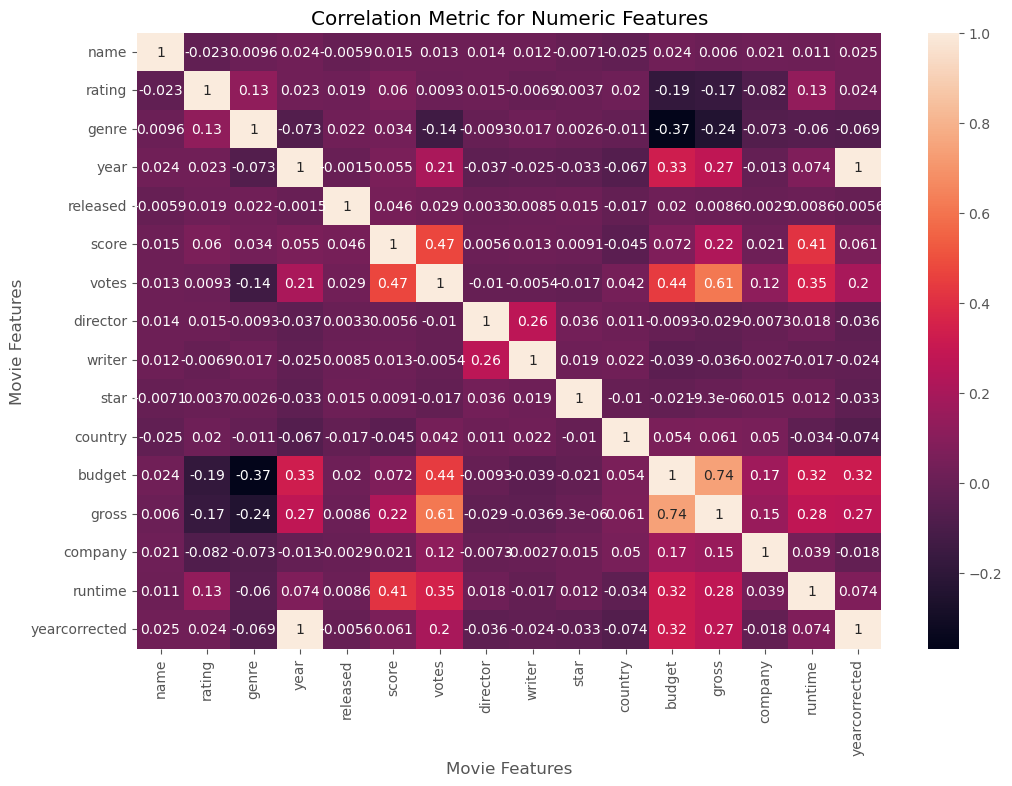

In [185]:
correlation_matrix = df_numerized.corr(method='pearson')
#correlation_matrix = df_numerized.corr(method='kendall')
#correlation_matrix = df_numerized.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

The bigger the coefficient the higher the correlation. So, from the heatmap 'budget' and 'votes' have the biggest coefficient, 0.74 and 0.61, respectively. In this case, there are so many correlations, so it will be useful to obtain only the highest correlations by doing the following:

In [186]:
correlation_mat = df_numerized.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

high_corr

gross          votes            0.614904
votes          gross            0.614904
gross          budget           0.740395
budget         gross            0.740395
year           yearcorrected    0.998641
yearcorrected  year             0.998641
dtype: float64

After double-checking, 'budget' and 'votes' have the highest correlations with 'gross' earnings.

### Correlation between 'budget' and 'gross' earnings

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Budget vs. Gross Earnings')

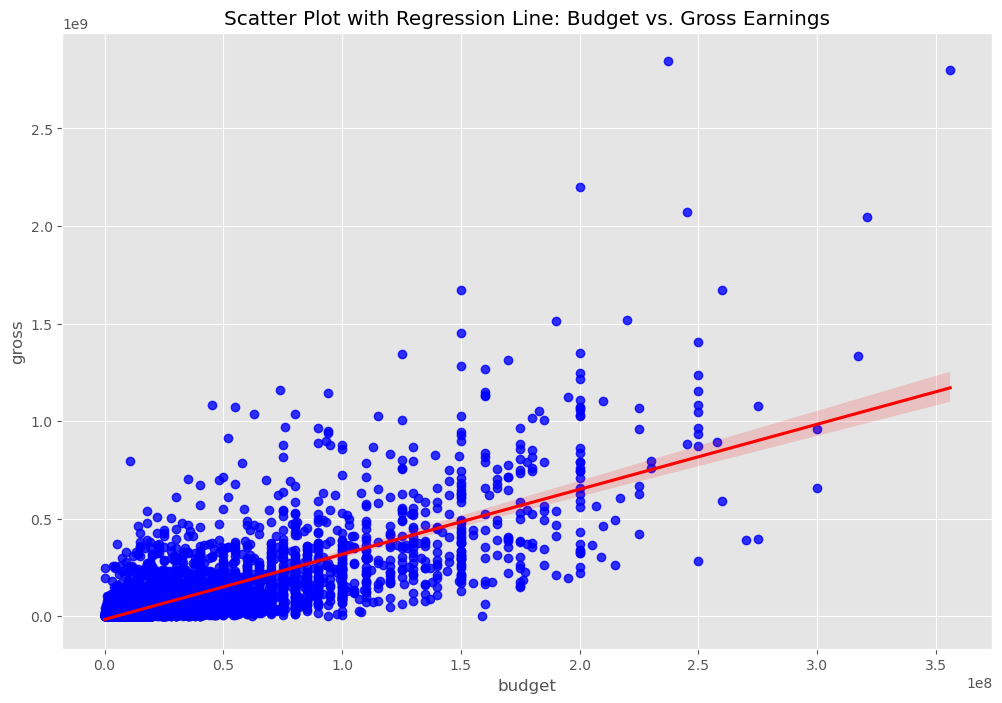

In [189]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Scatter Plot with Regression Line: Budget vs. Gross Earnings')

The scatter plot illustrates the raw data, showing how 'budget' and 'gross' earnings are distributed among movies. The regression line is a straight line that summarizes the overall trend or relationship between 'budget' and 'gross' earnings. It has a positive slope, so it means there is a positive correlation. In this case, as movie budgets increase, gross earnings tend to increase as well. This suggests that budget has a positive impact on earnings.

### Correlation between 'votes' and 'gross' earnings

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Votes vs. Gross Earnings')

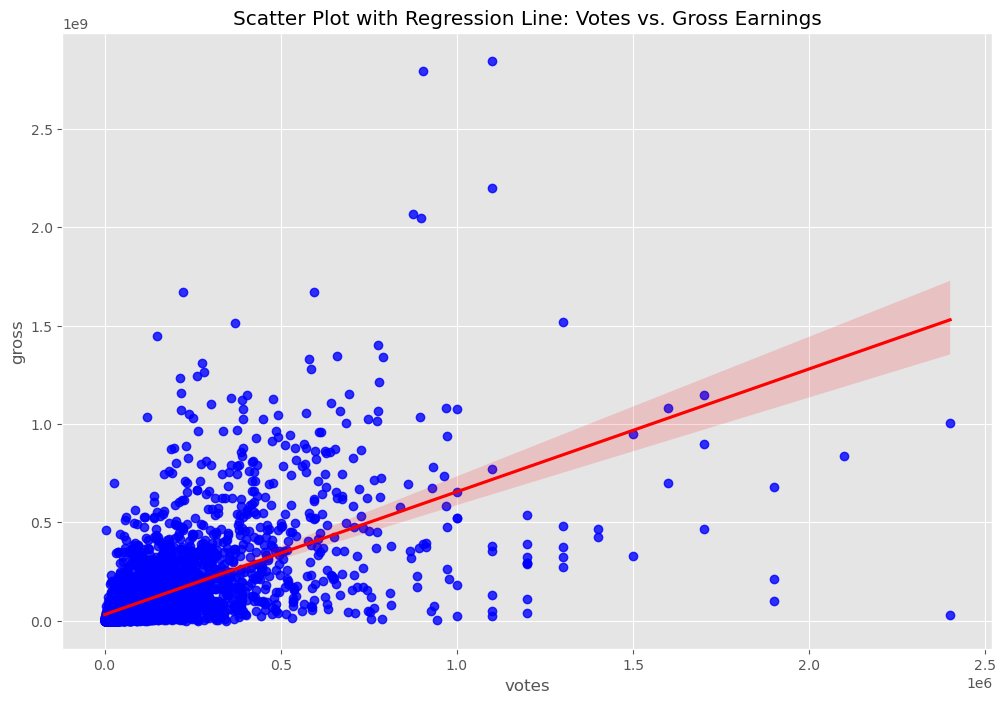

In [190]:
# Plot votes vs gross using seaborn

sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Scatter Plot with Regression Line: Votes vs. Gross Earnings')

The scatter plot visually presents the distribution of movies based on their audience ratings and gross earnings. The regression line is a straight line that summarizes the overall trend or relationship between 'votes' and 'gross' earnings. It also has a positive slope, and a positive correlation. In this case, as the number of votes (audience ratings) increases, gross earnings tend to increase. This implies that movies with higher audience ratings tend to perform better at the box office.

# Conclusions

The main conclusion is that 'budget' and 'votes' have the highest correlations to gross earnings. Both have a positive correlation: as movie's budget and audience ratings increase, gross earnings tend to increase as well.

However, it's important to emphasize that correlation does not imply causation. While the scatter plots and regression lines show an association between audience ratings ('votes') and box office earnings ('gross'), and between 'budget' and 'gross', further analysis would be needed to establish causation and consider potential confounding variables that influence movie success.